In [5]:
import gps_particle_data
import wget
import os
import numpy as np 
import time
import json
import sys
import math
from datetime import datetime, timedelta, date
from itertools import compress
from random import randint
import urllib2
import aacgmv2

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
start_date = datetime(2013,1,1,0,0,0);
end_date = datetime(2013,1,11,0,0,0);
ms = gps_particle_data.meta_search();
ms.load_data(start_date,end_date);


Loading data for satellite  53
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns53/ns53_130106_v1.03.ascii


In [7]:
output_data = ms.get_all_data_by_satellite();
burst_events = ms.get_burst_events(output_data);

eq_s = gps_particle_data.earthquake_search(start_date,end_date, min_magnitude=2,min_lat=-90,max_lat=90,min_lon=90,max_lon=180);

L_shells = eq_s.get_L_shells(500.0);
eq_datetimes = eq_s.get_datetimes();

datetimes_small_del_L = [];
eq = []

for ib, be in enumerate(burst_events):
    if(ib%20==0):
        print 'Burst #', ib, '/', len(burst_events);
        print 'Date : ', be.date;
        print 'L-shell : ', be.data['L_shell'];
   
    # Get the datetime spread
    pre_gap = timedelta(hours=-12);
    post_gap = timedelta(hours=12);
   
    start_date = be.date+pre_gap;
    end_date = be.date+post_gap;

    # Compare with EQs
    for i,info in enumerate(eq_s.earthquake_information):
        # Print the details of the Sumatran earthquake
        del_L = math.fabs(be.data['L_shell'] - L_shells[i]);
        del_time = eq_datetimes[i] - be.data['datetime'];
        time_test = (del_time<timedelta(days=10)) and (del_time>timedelta(days=-10));

        if( (del_L<0.1) and time_test):
            #print 'Matching EQ... '
            #print info;
            eq.append([be.data['datetime'], eq_datetimes[i], info[1]])
            #print 'L_shell: ', be.data['L_shell'], L_shells[i];
            datetimes_small_del_L.append(be.data['datetime'] - eq_datetimes[i]);

Burst # 0 / 1006
Date :  2013-01-06 00:46:00
L-shell :  6.025259
Burst # 20 / 1006
Date :  2013-01-06 02:06:00
L-shell :  4.105054
Burst # 40 / 1006
Date :  2013-01-06 03:26:00
L-shell :  5.34443
Burst # 60 / 1006
Date :  2013-01-06 08:02:00
L-shell :  4.371064
Burst # 80 / 1006
Date :  2013-01-06 09:22:00
L-shell :  5.336666
Burst # 100 / 1006
Date :  2013-01-06 14:26:00
L-shell :  4.387537
Burst # 120 / 1006
Date :  2013-01-06 15:46:00
L-shell :  4.947075
Burst # 140 / 1006
Date :  2013-01-06 20:14:00
L-shell :  4.558106
Burst # 160 / 1006
Date :  2013-01-06 21:34:00
L-shell :  4.79119
Burst # 180 / 1006
Date :  2013-01-07 01:26:00
L-shell :  4.562503
Burst # 200 / 1006
Date :  2013-01-07 02:46:00
L-shell :  4.339169
Burst # 220 / 1006
Date :  2013-01-07 07:30:00
L-shell :  4.828287
Burst # 240 / 1006
Date :  2013-01-07 08:50:00
L-shell :  4.577176
Burst # 260 / 1006
Date :  2013-01-07 14:06:00
L-shell :  4.63813
Burst # 280 / 1006
Date :  2013-01-07 15:26:00
L-shell :  4.583545
Burs

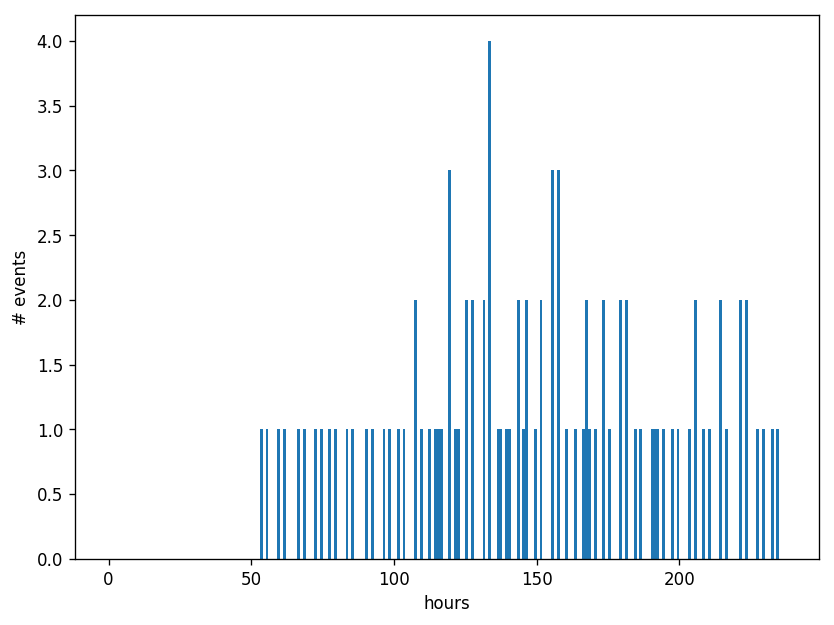

In [8]:
delta_times_seconds = [];
for tdelta in datetimes_small_del_L:
    tdel = (tdelta.seconds + tdelta.days*86400)/3600
    delta_times_seconds.append(tdel);
#print delta_times_seconds
fig = plt.figure(figsize=(8, 6), dpi=120)
plt.xlabel('hours')
plt.ylabel('# events')
plt.hist(delta_times_seconds, bins = np.arange(max(delta_times_seconds)))
plt.savefig('1-1-13 - 1-1-14 ns53---M>6,L<0.05.png')
plt.show()